# Projekt rekrutacyjny do koła Data Science Politechniki Warszawskiej

### Model machine learnignowy na zbiorze Titanic, autor: Michał Stobiecki

In [385]:
%load_ext autotime
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')



The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2022-10-23 15:47:28 +02:00)


In [386]:
df = pd.read_html("https://github.com/datasciencedojo/datasets/blob/master/titanic.csv")[0]

time: 2.14 s (started: 2022-10-23 15:47:28 +02:00)


In [387]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,NaN,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,NaN,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,NaN,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,NaN,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


time: 16 ms (started: 2022-10-23 15:47:30 +02:00)


In [388]:
#usuńmy zbędną kolumnę
del df["Unnamed: 0"]

time: 0 ns (started: 2022-10-23 15:47:30 +02:00)


In [389]:
#sprawdźmy typy danych
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

time: 0 ns (started: 2022-10-23 15:47:30 +02:00)


In [390]:
#zmieńmy typ object na string
df["Name"] = df["Name"].astype("string")
df["Sex"] = df["Sex"].astype("string")
df["Ticket"] = df["Ticket"].astype("string")
df["Cabin"] = df["Cabin"].astype("string")
df["Embarked"] = df["Embarked"].astype("string")

time: 15 ms (started: 2022-10-23 15:47:30 +02:00)


In [391]:
#zmieńmy kolejność kolumn w zbiorze
df = df[['PassengerId', 'Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']]

time: 16 ms (started: 2022-10-23 15:47:30 +02:00)


In [392]:
#ustawmy PassengerId jako indeks
df = df.set_index("PassengerId")

time: 0 ns (started: 2022-10-23 15:47:30 +02:00)


# Weryfikacja czy są duplikaty

In [393]:
set(df[['Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Survived']].duplicated()) #brak duplikatów

{False}

time: 15 ms (started: 2022-10-23 15:47:30 +02:00)


# Analiza zmiennych, które nie są numeryczne

In [394]:
#Pomoże to uniknąć niedogodności w danych

time: 0 ns (started: 2022-10-23 15:47:30 +02:00)


Kolumna Embarked

In [395]:
set(df.Embarked)

#Embarked czyli z jakiego portu dany pasażer rozpoczął podróż
#C - Cherbourg
#S -Southampton
#Q - Queenstown

{<NA>, 'C', 'Q', 'S'}

time: 16 ms (started: 2022-10-23 15:47:30 +02:00)


In [396]:
#Zamiana skrótów na pełne nazwy dla przejrzystości
df["Embarked"][df.Embarked == "C"] = "Cherbourg"
df["Embarked"][df.Embarked == "S"] = "Southampton"
df["Embarked"][df.Embarked == "Q"] = "Queenstown"

time: 15 ms (started: 2022-10-23 15:47:30 +02:00)


In [397]:
df["Embarked"].value_counts(dropna=False)

Southampton    644
Cherbourg      168
Queenstown      77
<NA>             2
Name: Embarked, dtype: Int64

time: 16 ms (started: 2022-10-23 15:47:30 +02:00)


Kolumna Sex

In [398]:
df["Sex"].value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: Int64

time: 0 ns (started: 2022-10-23 15:47:30 +02:00)


Kolumna Ticket

In [399]:
df["Ticket"].value_counts() #za dużo kategorii, aby stworzyć z niej zmienną kategoryczną
#może warto pobawić się w text mining i znaleźć coś co się powtarza w danych
#na pierwszy rzut oka widać np. słowo CA na początku niektórych biletów

347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
2683                1
SOTON/O2 3101287    1
11774               1
392092              1
370376              1
Name: Ticket, Length: 681, dtype: Int64

time: 0 ns (started: 2022-10-23 15:47:31 +02:00)


In [400]:
df[df.Ticket == "347082"] #duplikat w nazwie biletu oznacza to, że nazwiska kilku osób są na jednym bilecie
#W oczy rzuczają się także kolumny SibSp (liczba rodzeństwa i partnerów na statku) oraz Parch (liczbę rodziców/dzieci na statkui) 
#i Fare (opłata za rejs)

,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
14,"Andersson, Mr. Anders Johan",3,male,39.0,1,5,347082,31.275,<NA>,Southampton,0
120,"Andersson, Miss. Ellis Anna Maria",3,female,2.0,4,2,347082,31.275,<NA>,Southampton,0
542,"Andersson, Miss. Ingeborg Constanzia",3,female,9.0,4,2,347082,31.275,<NA>,Southampton,0
543,"Andersson, Miss. Sigrid Elisabeth",3,female,11.0,4,2,347082,31.275,<NA>,Southampton,0
611,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",3,female,39.0,1,5,347082,31.275,<NA>,Southampton,0
814,"Andersson, Miss. Ebba Iris Alfrida",3,female,6.0,4,2,347082,31.275,<NA>,Southampton,0
851,"Andersson, Master. Sigvard Harald Elias",3,male,4.0,4,2,347082,31.275,<NA>,Southampton,0


time: 15 ms (started: 2022-10-23 15:47:31 +02:00)


In [401]:
df[df.Ticket == "1601"]
#osoby, które mają ten sam numer biletu, a mają 0 w SibSp i Parch - dziwna sytuacja

,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
75,"Bing, Mr. Lee",3,male,32.0,0,0,1601,56.4958,<NA>,Southampton,1
170,"Ling, Mr. Lee",3,male,28.0,0,0,1601,56.4958,<NA>,Southampton,0
510,"Lang, Mr. Fang",3,male,26.0,0,0,1601,56.4958,<NA>,Southampton,1
644,"Foo, Mr. Choong",3,male,NaN,0,0,1601,56.4958,<NA>,Southampton,1
693,"Lam, Mr. Ali",3,male,NaN,0,0,1601,56.4958,<NA>,Southampton,1
827,"Lam, Mr. Len",3,male,NaN,0,0,1601,56.4958,<NA>,Southampton,0
839,"Chip, Mr. Chang",3,male,32.0,0,0,1601,56.4958,<NA>,Southampton,1


time: 15 ms (started: 2022-10-23 15:47:31 +02:00)


In [402]:
df[df.Ticket == "3101295"]

,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
51,"Panula, Master. Juha Niilo",3,male,7.0,4,1,3101295,39.6875,<NA>,Southampton,0
165,"Panula, Master. Eino Viljami",3,male,1.0,4,1,3101295,39.6875,<NA>,Southampton,0
267,"Panula, Mr. Ernesti Arvid",3,male,16.0,4,1,3101295,39.6875,<NA>,Southampton,0
639,"Panula, Mrs. Juha (Maria Emilia Ojala)",3,female,41.0,0,5,3101295,39.6875,<NA>,Southampton,0
687,"Panula, Mr. Jaako Arnold",3,male,14.0,4,1,3101295,39.6875,<NA>,Southampton,0
825,"Panula, Master. Urho Abraham",3,male,2.0,4,1,3101295,39.6875,<NA>,Southampton,0


time: 16 ms (started: 2022-10-23 15:47:31 +02:00)


In [403]:
df[df.Ticket == "CA. 2343"]

,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
160,"Sage, Master. Thomas Henry",3,male,NaN,8,2,CA. 2343,69.55,<NA>,Southampton,0
181,"Sage, Miss. Constance Gladys",3,female,NaN,8,2,CA. 2343,69.55,<NA>,Southampton,0
202,"Sage, Mr. Frederick",3,male,NaN,8,2,CA. 2343,69.55,<NA>,Southampton,0
325,"Sage, Mr. George John Jr",3,male,NaN,8,2,CA. 2343,69.55,<NA>,Southampton,0
793,"Sage, Miss. Stella Anna",3,female,NaN,8,2,CA. 2343,69.55,<NA>,Southampton,0
847,"Sage, Mr. Douglas Bullen",3,male,NaN,8,2,CA. 2343,69.55,<NA>,Southampton,0
864,"Sage, Miss. Dorothy Edith ""Dolly""",3,female,NaN,8,2,CA. 2343,69.55,<NA>,Southampton,0


time: 16 ms (started: 2022-10-23 15:47:32 +02:00)


In [404]:
set(df["Ticket"]) 
#Można wykonać łączenie kategorii ze sobą i odbywałoby się to na kilka sposobow: branie pod uwagi długości stringa,
#podobieństwa wartości, czy podobieństwa pierwszych znaków ale byłoby to czasochłonne.

{'110152',
 '110413',
 '110465',
 '110564',
 '110813',
 '111240',
 '111320',
 '111361',
 '111369',
 '111426',
 '111427',
 '111428',
 '112050',
 '112052',
 '112053',
 '112058',
 '112059',
 '112277',
 '112379',
 '113028',
 '113043',
 '113050',
 '113051',
 '113055',
 '113056',
 '113059',
 '113501',
 '113503',
 '113505',
 '113509',
 '113510',
 '113514',
 '113572',
 '113760',
 '113767',
 '113773',
 '113776',
 '113781',
 '113783',
 '113784',
 '113786',
 '113787',
 '113788',
 '113789',
 '113792',
 '113794',
 '113796',
 '113798',
 '113800',
 '113803',
 '113804',
 '113806',
 '113807',
 '11668',
 '11751',
 '11752',
 '11753',
 '11755',
 '11765',
 '11767',
 '11769',
 '11771',
 '11774',
 '11813',
 '11967',
 '12233',
 '12460',
 '12749',
 '13049',
 '13213',
 '13214',
 '13502',
 '13507',
 '13509',
 '13567',
 '13568',
 '14311',
 '14312',
 '14313',
 '14973',
 '1601',
 '16966',
 '16988',
 '17421',
 '17453',
 '17463',
 '17464',
 '17465',
 '17466',
 '17474',
 '17764',
 '19877',
 '19928',
 '19943',
 '19947'

time: 0 ns (started: 2022-10-23 15:47:32 +02:00)


Kolumna Cabin

In [405]:
df["Cabin"].value_counts(dropna=False)
#dominującą kategorią są braki danych
#kolumna-kandydat do usunięcia z modelu

<NA>           687
G6               4
B96 B98          4
C23 C25 C27      4
F33              3
              ... 
C95              1
B101             1
B3               1
E77              1
C148             1
Name: Cabin, Length: 148, dtype: Int64

time: 0 ns (started: 2022-10-23 15:47:32 +02:00)


# Analiza braków danych

#### Pierwszą rzeczą jaką należy zrobić jest analiza braków danych

In [406]:
df.isna().sum()

Name          0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Survived      0
dtype: int64

time: 0 ns (started: 2022-10-23 15:47:32 +02:00)


Mamy 3 kolumny z brakami danych, ale nie sprawdziliśmy czy 687 braków danych w kolumnie Cabin to dużo


In [407]:
df.shape #wymiary tabeli - 891 to liczba wierszy, a 11 to liczba kolumna

(891, 11)

time: 0 ns (started: 2022-10-23 15:47:33 +02:00)


In [408]:
df.isna().sum()/df.shape[0]

Name        0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
Survived    0.000000
dtype: float64

time: 0 ns (started: 2022-10-23 15:47:33 +02:00)


Uzupełnienie braków danych dla kolumny Cabin będzie i trudne i istnieje duże prawdopodobieństwo, że robiąc imputację będziemy się mylić, więc usunę tę kolumnę. 
Age i Embarked zostanie poddany procesowi imputacji. 

In [409]:
del df["Cabin"]

time: 0 ns (started: 2022-10-23 15:47:33 +02:00)


# Imputacja braków danych

Kolumna Age

In [410]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

time: 0 ns (started: 2022-10-23 15:47:34 +02:00)


<AxesSubplot: >

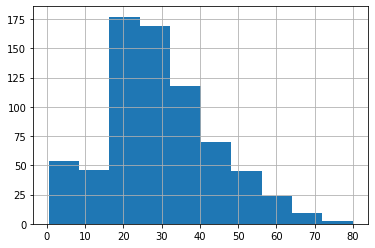

time: 156 ms (started: 2022-10-23 15:47:34 +02:00)


In [411]:
df["Age"].hist()

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

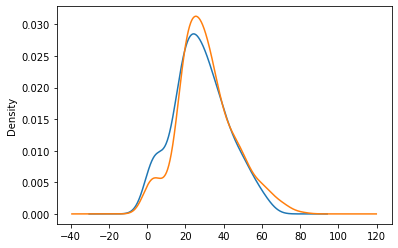

time: 156 ms (started: 2022-10-23 15:47:34 +02:00)


In [412]:
#df.groupby("Sex")["Age"].hist()
df.groupby('Sex').Age.plot(kind='kde')

In [413]:
#Z powyższych informacji wynika, że średnia wieku jest nieznacznie większa niż mediana, a rozkłady wieku w podziale na płeć nie 
#różnią się znacząco. 

time: 0 ns (started: 2022-10-23 15:47:34 +02:00)


Braki danych zostaną uzupełnione średnią w podziale na płeć. Będzie ingerowało w rozkład, ale jest to szybka i prosta metoda.

In [414]:
df["Age"] = df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean"))

time: 0 ns (started: 2022-10-23 15:47:35 +02:00)


Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

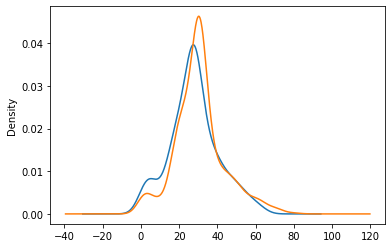

time: 125 ms (started: 2022-10-23 15:47:35 +02:00)


In [415]:
df.groupby('Sex').Age.plot(kind='kde')
#Zmiana rozkładów dla wieku w podziale na płeć jest widoczna.

Kolumna Embarked

In [416]:
df["Embarked"].value_counts(dropna=False)

Southampton    644
Cherbourg      168
Queenstown      77
<NA>             2
Name: Embarked, dtype: Int64

time: 0 ns (started: 2022-10-23 15:47:35 +02:00)


In [417]:
df[df.Embarked.isnull() == True]

,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
PassengerId,,,,,,,,,,
62,"Icard, Miss. Amelie",1,female,38.0,0,0,113572,80.0,<NA>,1
830,"Stone, Mrs. George Nelson (Martha Evelyn)",1,female,62.0,0,0,113572,80.0,<NA>,1


time: 0 ns (started: 2022-10-23 15:47:35 +02:00)


In [418]:
#Uzupełnijmy brak danych dla tych dwóch obserwacji najczęściej występującą kategorią, czyli Southampton
df["Embarked"][df.Embarked.isnull() == True] = df["Embarked"].value_counts(dropna=False).index[0]

time: 15 ms (started: 2022-10-23 15:47:35 +02:00)


# Feature engineering

Nazwisko

In [419]:
#Spróbujemy wyciągnąć nazwisko do nowej kolumny. Pomoże nam to weryfikować pewne rzeczy, o których napiszę później.
df["Nazwisko"] = [x.split(",")[0] for x in df.Name]
#df["Name"].str.split(",")[0]

time: 0 ns (started: 2022-10-23 15:47:36 +02:00)


In [420]:
df.head()

,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Nazwisko
PassengerId,,,,,,,,,,,
1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,Southampton,0,Braund
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,Cherbourg,1,Cumings
3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton,1,Heikkinen
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,Southampton,1,Futrelle
5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,Southampton,0,Allen


time: 16 ms (started: 2022-10-23 15:47:36 +02:00)


SibSp oraz Parch

In [421]:
#Zmienne SibSp oraz Parch powinny zostać zsumowane i stworzyć jedną zmienną, ponieważ gdy rodzina jest w niebezpiezceństwie
#każdy myśli o każdym. Tak podpowiada logika (tym razem niebiznesowa). Pojedynczo te zmienne nie mają sensu, więc zostaną
#usunięte, lecz wcześniej zauważyłem, że ludzie, którzy mają wspólny bilet też mogą być w jakiś sposób związani.
#Wyliczenie częstości występowania biletu pozwoli stworzyć lepszą zmienną niż suma SibSp i Parch

ticket = df["Ticket"].value_counts().reset_index().rename(columns={"Ticket":"Ticket_freq","index":"Ticket"})
ticket.head()

,Ticket,Ticket_freq
0,347082,7
1,1601,7
2,CA. 2343,7
3,3101295,6
4,CA 2144,6


time: 16 ms (started: 2022-10-23 15:47:36 +02:00)


In [422]:
df = pd.merge(df.reset_index(), ticket, how="left", on="Ticket")
df = df.set_index("PassengerId")

time: 0 ns (started: 2022-10-23 15:47:37 +02:00)


In [423]:
#Od zmiennej Ticket_freq należy odjąć 1, ponieważ ma ona ukazywać ile osób związanych z daną osobą jest na pokładzie.
df["Ticket_freq"] = df["Ticket_freq"]-1

time: 15 ms (started: 2022-10-23 15:47:37 +02:00)


In [424]:
df.head()

,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Nazwisko,Ticket_freq
PassengerId,,,,,,,,,,,,
1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,Southampton,0,Braund,0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,Cherbourg,1,Cumings,0
3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton,1,Heikkinen,0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,Southampton,1,Futrelle,1
5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,Southampton,0,Allen,0


time: 0 ns (started: 2022-10-23 15:47:37 +02:00)


In [425]:
#Może wystąpić także sytuacja, w której członkowie rodziny mają bilety nabyte indywiudualnie.
#Z tego też powodu jednak stworzę zmienną, która jest sumą SibSp oraz Parch.
df["family_members"] = df["SibSp"] + df["Parch"]
del df["SibSp"]
del df["Parch"]

time: 0 ns (started: 2022-10-23 15:47:37 +02:00)


In [426]:
#Na podstawie familiy_members i Ticket_freq stworzę zmienną
df["rodzina_na_pokładzie"] = [max(family_members,Ticket_freq)
                              for family_members,Ticket_freq in zip(df["family_members"],df["Ticket_freq"])]

time: 0 ns (started: 2022-10-23 15:47:37 +02:00)


In [427]:
del df["family_members"]
del df["Ticket_freq"]

time: 0 ns (started: 2022-10-23 15:47:38 +02:00)


Embarked

In [428]:
#Dla zmiennej Embarked widzimy 3 kategorie, które różnią się częstością wystąpień.
#Wykorzystam frequency encoding, ponieważ zamierzam wykorzystać model bazujący na drzewie decyzyjnym
#który powinien dobrze sobie poradzić z odróżnieniem tych zmiennych. 
df["Embarked"].value_counts(dropna=False)

Southampton    646
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: Int64

time: 0 ns (started: 2022-10-23 15:47:38 +02:00)


In [429]:
df["Embarked_fe"] = np.nan
df["Embarked_fe"][df.Embarked == "Southampton"] = 646
df["Embarked_fe"][df.Embarked == "Cherbourg"] = 168
df["Embarked_fe"][df.Embarked == "Queenstown"] = 77

time: 62 ms (started: 2022-10-23 15:47:38 +02:00)


In [430]:
#Z kolumny Name można wydobyć stan cywilny pasażera
df["Marital_Status"] = np.nan
df["Marital_Status"][df.Name.str.contains("Mr.")] = "Mr."
df["Marital_Status"][df.Name.str.contains("Mrs.")] = "Mrs."
df["Marital_Status"][df.Name.str.contains("Miss.")] = "Miss."
df["Marital_Status"][df.Name.str.contains("Master.")] = "Master."
df["Marital_Status"][df.Name.str.contains("Don.")] = "Don."
df["Marital_Status"][df.Name.str.contains("Rev.")] = "Rev."
df["Marital_Status"][df.Name.str.contains("Dr.")] = "Dr."
df["Marital_Status"][df.Name.str.contains("Major.")] = "Major."
df["Marital_Status"] = df["Marital_Status"].fillna("reszta")

time: 31 ms (started: 2022-10-23 15:47:38 +02:00)


In [431]:
df.Marital_Status.value_counts()
#Kategorie od Master. do Major. mogą zostać połączone ze sobą i nazwane jako "reszta"

Mr.        515
Miss.      181
Mrs.       126
Master.     40
Dr.         11
reszta       8
Rev.         6
Don.         2
Major.       2
Name: Marital_Status, dtype: int64

time: 0 ns (started: 2022-10-23 15:47:39 +02:00)


In [432]:
df["Marital_Status"][df.Marital_Status.isin(["Master.", "Dr.", "reszta", "Rev.", "Don.", "Major."])] = "reszta"

time: 15 ms (started: 2022-10-23 15:47:39 +02:00)


In [433]:
df.Marital_Status.value_counts(dropna=False)
#Kategorie od Master. do Major. mogą zostać połączone ze sobą i nazwane jako "reszta"

Mr.       515
Miss.     181
Mrs.      126
reszta     69
Name: Marital_Status, dtype: int64

time: 0 ns (started: 2022-10-23 15:47:39 +02:00)


In [434]:
#Ponownie można wykorzystać frequency encoding
df["Marital_Status_fe"] = np.nan
df["Marital_Status_fe"][df.Marital_Status == "Mr."] = 515
df["Marital_Status_fe"][df.Marital_Status == "Miss."] = 181
df["Marital_Status_fe"][df.Marital_Status == "Mrs."] = 126
df["Marital_Status_fe"][df.Marital_Status == "reszta"] = 69

time: 47 ms (started: 2022-10-23 15:47:39 +02:00)


In [435]:
df.head()

,Name,Pclass,Sex,Age,Ticket,Fare,Embarked,Survived,Nazwisko,rodzina_na_pokładzie,Embarked_fe,Marital_Status,Marital_Status_fe
PassengerId,,,,,,,,,,,,,
1,"Braund, Mr. Owen Harris",3,male,22.0,A/5 21171,7.2500,Southampton,0,Braund,1,646.0,Mr.,515.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,PC 17599,71.2833,Cherbourg,1,Cumings,1,168.0,Mrs.,126.0
3,"Heikkinen, Miss. Laina",3,female,26.0,STON/O2. 3101282,7.9250,Southampton,1,Heikkinen,0,646.0,Miss.,181.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,113803,53.1000,Southampton,1,Futrelle,1,646.0,Mrs.,126.0
5,"Allen, Mr. William Henry",3,male,35.0,373450,8.0500,Southampton,0,Allen,0,646.0,Mr.,515.0


time: 16 ms (started: 2022-10-23 15:47:39 +02:00)


In [436]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

time: 0 ns (started: 2022-10-23 15:47:40 +02:00)


# Przygotowanie zbioru pod modelowanie

In [437]:
df_new = df[['Pclass', 'Sex', 'Age', 'Fare', 'rodzina_na_pokładzie', 'Embarked_fe', 'Marital_Status_fe', 'Survived']]

time: 0 ns (started: 2022-10-23 15:47:40 +02:00)


In [438]:
df_new.head()

,Pclass,Sex,Age,Fare,rodzina_na_pokładzie,Embarked_fe,Marital_Status_fe,Survived
PassengerId,,,,,,,,
1,3,male,22.0,7.2500,1,646.0,515.0,0
2,1,female,38.0,71.2833,1,168.0,126.0,1
3,3,female,26.0,7.9250,0,646.0,181.0,1
4,1,female,35.0,53.1000,1,646.0,126.0,1
5,3,male,35.0,8.0500,0,646.0,515.0,0


time: 0 ns (started: 2022-10-23 15:47:40 +02:00)


##### One hot encoding

In [439]:
#zmiennych kategorycznych uporządkowanych - Pclass nie trzeba odkodować na zmienne zero-jedynkowe
#drzewo poradzi sobie z takim przypadkiem. Ale stringi już trzeba.
df_new["Sex"][df_new.Sex == "male"] = 1 
df_new["Sex"][df_new.Sex == "female"] = 0
df_new["Sex"] = df_new["Sex"].astype(int)

time: 47 ms (started: 2022-10-23 15:47:41 +02:00)


In [440]:
df_new.head()

,Pclass,Sex,Age,Fare,rodzina_na_pokładzie,Embarked_fe,Marital_Status_fe,Survived
PassengerId,,,,,,,,
1,3,1,22.0,7.2500,1,646.0,515.0,0
2,1,0,38.0,71.2833,1,168.0,126.0,1
3,3,0,26.0,7.9250,0,646.0,181.0,1
4,1,0,35.0,53.1000,1,646.0,126.0,1
5,3,1,35.0,8.0500,0,646.0,515.0,0


time: 16 ms (started: 2022-10-23 15:47:41 +02:00)


In [441]:
#podział na zbiór treningowy i testowy 75% - 25%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_new[['Pclass', 'Sex', 'Age', 'Fare', 'rodzina_na_pokładzie',
       'Embarked_fe', 'Marital_Status_fe']], df_new["Survived"], test_size=0.25, random_state=42)

time: 0 ns (started: 2022-10-23 15:47:41 +02:00)


In [442]:
df_new.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

time: 15 ms (started: 2022-10-23 15:47:42 +02:00)


In [443]:
y_train.value_counts(normalize=True)

0    0.621257
1    0.378743
Name: Survived, dtype: float64

time: 0 ns (started: 2022-10-23 15:47:43 +02:00)


In [444]:
y_test.value_counts(normalize=True) 
#podział zbioru został wykonany dobrze
#stosunek zer do jedynek w każdym ze zbiorów jest podobny

0    0.600897
1    0.399103
Name: Survived, dtype: float64

time: 0 ns (started: 2022-10-23 15:47:44 +02:00)


In [445]:
X_train.head()

,Pclass,Sex,Age,Fare,rodzina_na_pokładzie,Embarked_fe,Marital_Status_fe
PassengerId,,,,,,,
299,1,1,30.726645,30.5000,0,646.0,515.0
885,3,1,25.000000,7.0500,0,646.0,515.0
248,2,0,24.000000,14.5000,2,646.0,126.0
479,3,1,22.000000,7.5208,0,646.0,515.0
306,1,1,0.920000,151.5500,3,646.0,69.0


time: 0 ns (started: 2022-10-23 15:47:45 +02:00)


Zbiór jest gotowy do modelowania

# Hipotezy badawcze

## 1. Podejrzewam, że osoby z pierwszej klasy mają większe szanse na przeżycie niż osoby w niższych klasach.

## 2. Osoby, które mają wiele powiązanych ze sobą osób na pokładzie mają mniejsze szanse na przeżycie niż osoby, które mają mniej takich osób.

## 3. Osoby skrajnie młode i skrajnie stare mają miejsze szanse na przeżycie niż osoby w sile wieku.

# Modelowanie

Wykorzystam drzewo decyzyjne i postaram znaleźć się takie wartości hiperparametrów, które nie doporowadzą do przeuczenia modelu

In [446]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score 
from tqdm import tqdm

time: 0 ns (started: 2022-10-23 15:47:47 +02:00)


In [447]:
for max_depth in [30,20,10,5,2]:
    for min_samples_leaf in [50, 10, 5, 2,1]:
        for ccp_alpha in [0.1, 0.01, 0.001, 0.0001, 0]:
            for criterion in ["gini", "entropy"]:
                model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, 
                                           min_samples_leaf=min_samples_leaf, 
                                           random_state=123, ccp_alpha=ccp_alpha).fit(X_train, y_train)
            
                y_pred_train = model.predict(X_train)
                balanced_accuracy_train = round(balanced_accuracy_score(y_train, y_pred_train), 3)
           
        
                y_pred_test = model.predict(X_test)
                balanced_accuracy_test = round(balanced_accuracy_score(y_test, y_pred_test), 3)
                różnica = abs(balanced_accuracy_test-balanced_accuracy_train)
                
                #jeśli różnica w wynikach dla zbioru trenngowego i testowego jest mniejsza niż 0.05
                #i wyniki na zbiorze treningowym i testwoym większe niż 0.8  to printuje wyniki
                if różnica < 0.05 and balanced_accuracy_test > 0.8 and balanced_accuracy_train > 0.8:
                    print("criterion: "+criterion, "max_depth: "+str(max_depth), "min_samples_leaf: "+str(min_samples_leaf), "ccp_alpha: "+str(ccp_alpha))
                    print("Train: Balanced accuracy = "+str(balanced_accuracy_train))
                    print("Test : Balanced accuracy = "+str(balanced_accuracy_test))
                    print("")

criterion: entropy max_depth: 30 min_samples_leaf: 10 ccp_alpha: 0.01
Train: Balanced accuracy = 0.816
Test : Balanced accuracy = 0.811

criterion: gini max_depth: 30 min_samples_leaf: 10 ccp_alpha: 0.001
Train: Balanced accuracy = 0.848
Test : Balanced accuracy = 0.811

criterion: gini max_depth: 30 min_samples_leaf: 10 ccp_alpha: 0.0001
Train: Balanced accuracy = 0.848
Test : Balanced accuracy = 0.811

criterion: gini max_depth: 30 min_samples_leaf: 10 ccp_alpha: 0
Train: Balanced accuracy = 0.848
Test : Balanced accuracy = 0.811

criterion: entropy max_depth: 30 min_samples_leaf: 5 ccp_alpha: 0.01
Train: Balanced accuracy = 0.816
Test : Balanced accuracy = 0.811

criterion: gini max_depth: 30 min_samples_leaf: 5 ccp_alpha: 0.001
Train: Balanced accuracy = 0.866
Test : Balanced accuracy = 0.828

criterion: entropy max_depth: 30 min_samples_leaf: 2 ccp_alpha: 0.01
Train: Balanced accuracy = 0.816
Test : Balanced accuracy = 0.811

criterion: entropy max_depth: 30 min_samples_leaf: 1 cc

In [452]:
#Najlepsze wyniki drzewo osiąga dla głębokości 5, dlatego warto sprawdzić inne głębokości drzewa
#w pobliżu 5
for max_depth in [8,7,6,5,4,3,2]:
    for min_samples_leaf in [50, 10, 5, 2,1]:
        for ccp_alpha in [0.1, 0.01, 0.001, 0.0001, 0]:
            for criterion in ["gini", "entropy"]:
                model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, 
                                           min_samples_leaf=min_samples_leaf, 
                                           random_state=123, ccp_alpha=ccp_alpha).fit(X_train, y_train)
            
                y_pred_train = model.predict(X_train)
                balanced_accuracy_train = round(balanced_accuracy_score(y_train, y_pred_train), 3)
           
                y_pred_test = model.predict(X_test)
                balanced_accuracy_test = round(balanced_accuracy_score(y_test, y_pred_test), 3)
                
                
                różnica = abs(balanced_accuracy_test-balanced_accuracy_train)
                #jeśli różnica w wynikach dla zbioru trenngowego i testowego jest mniejsza niż 0.05
                #i wyniki na zbiorze treningowym i testwoym większe niż 0.83 to printuje wyniki
                if różnica < 0.05 and balanced_accuracy_test > 0.83 and balanced_accuracy_train > 0.83:
                    print("criterion: "+criterion, "max_depth: "+str(max_depth), "min_samples_leaf: "+str(min_samples_leaf), "ccp_alpha: "+str(ccp_alpha))
                    print("Train: Balanced accuracy = "+str(balanced_accuracy_train))
                    print("Test : Balanced accuracy = "+str(balanced_accuracy_test))
                    print("")

criterion: gini max_depth: 7 min_samples_leaf: 5 ccp_alpha: 0.001
Train: Balanced accuracy = 0.863
Test : Balanced accuracy = 0.835

criterion: entropy max_depth: 5 min_samples_leaf: 5 ccp_alpha: 0.001
Train: Balanced accuracy = 0.832
Test : Balanced accuracy = 0.841

criterion: entropy max_depth: 5 min_samples_leaf: 5 ccp_alpha: 0.0001
Train: Balanced accuracy = 0.832
Test : Balanced accuracy = 0.841

criterion: entropy max_depth: 5 min_samples_leaf: 5 ccp_alpha: 0
Train: Balanced accuracy = 0.832
Test : Balanced accuracy = 0.841

criterion: gini max_depth: 5 min_samples_leaf: 2 ccp_alpha: 0.001
Train: Balanced accuracy = 0.839
Test : Balanced accuracy = 0.837

criterion: entropy max_depth: 5 min_samples_leaf: 2 ccp_alpha: 0.001
Train: Balanced accuracy = 0.835
Test : Balanced accuracy = 0.837

criterion: gini max_depth: 5 min_samples_leaf: 2 ccp_alpha: 0.0001
Train: Balanced accuracy = 0.839
Test : Balanced accuracy = 0.837

criterion: entropy max_depth: 5 min_samples_leaf: 2 ccp_alp

##### Najlepszy model ma takie hiperparametry: criterion: entropy, max_depth: 5, min_samples_leaf: 5, ccp_alpha: 0,
##### Wartość zbalansowanej dokładności na zbiorze treningowym równa jest 0,832, a na zbiorze testowym 0,841.

# Ocena jakości modelu

Model nie jest przetrenowany, ewentualnie można użyć innych statystyk, aby sprawdzić czy model lepiej klasyfikuje zera czy jedynki.

# Wizualizacja

In [470]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_leaf=5, 
                               random_state=123, ccp_alpha=0).fit(X_train, y_train)

time: 16 ms (started: 2022-10-23 16:09:38 +02:00)


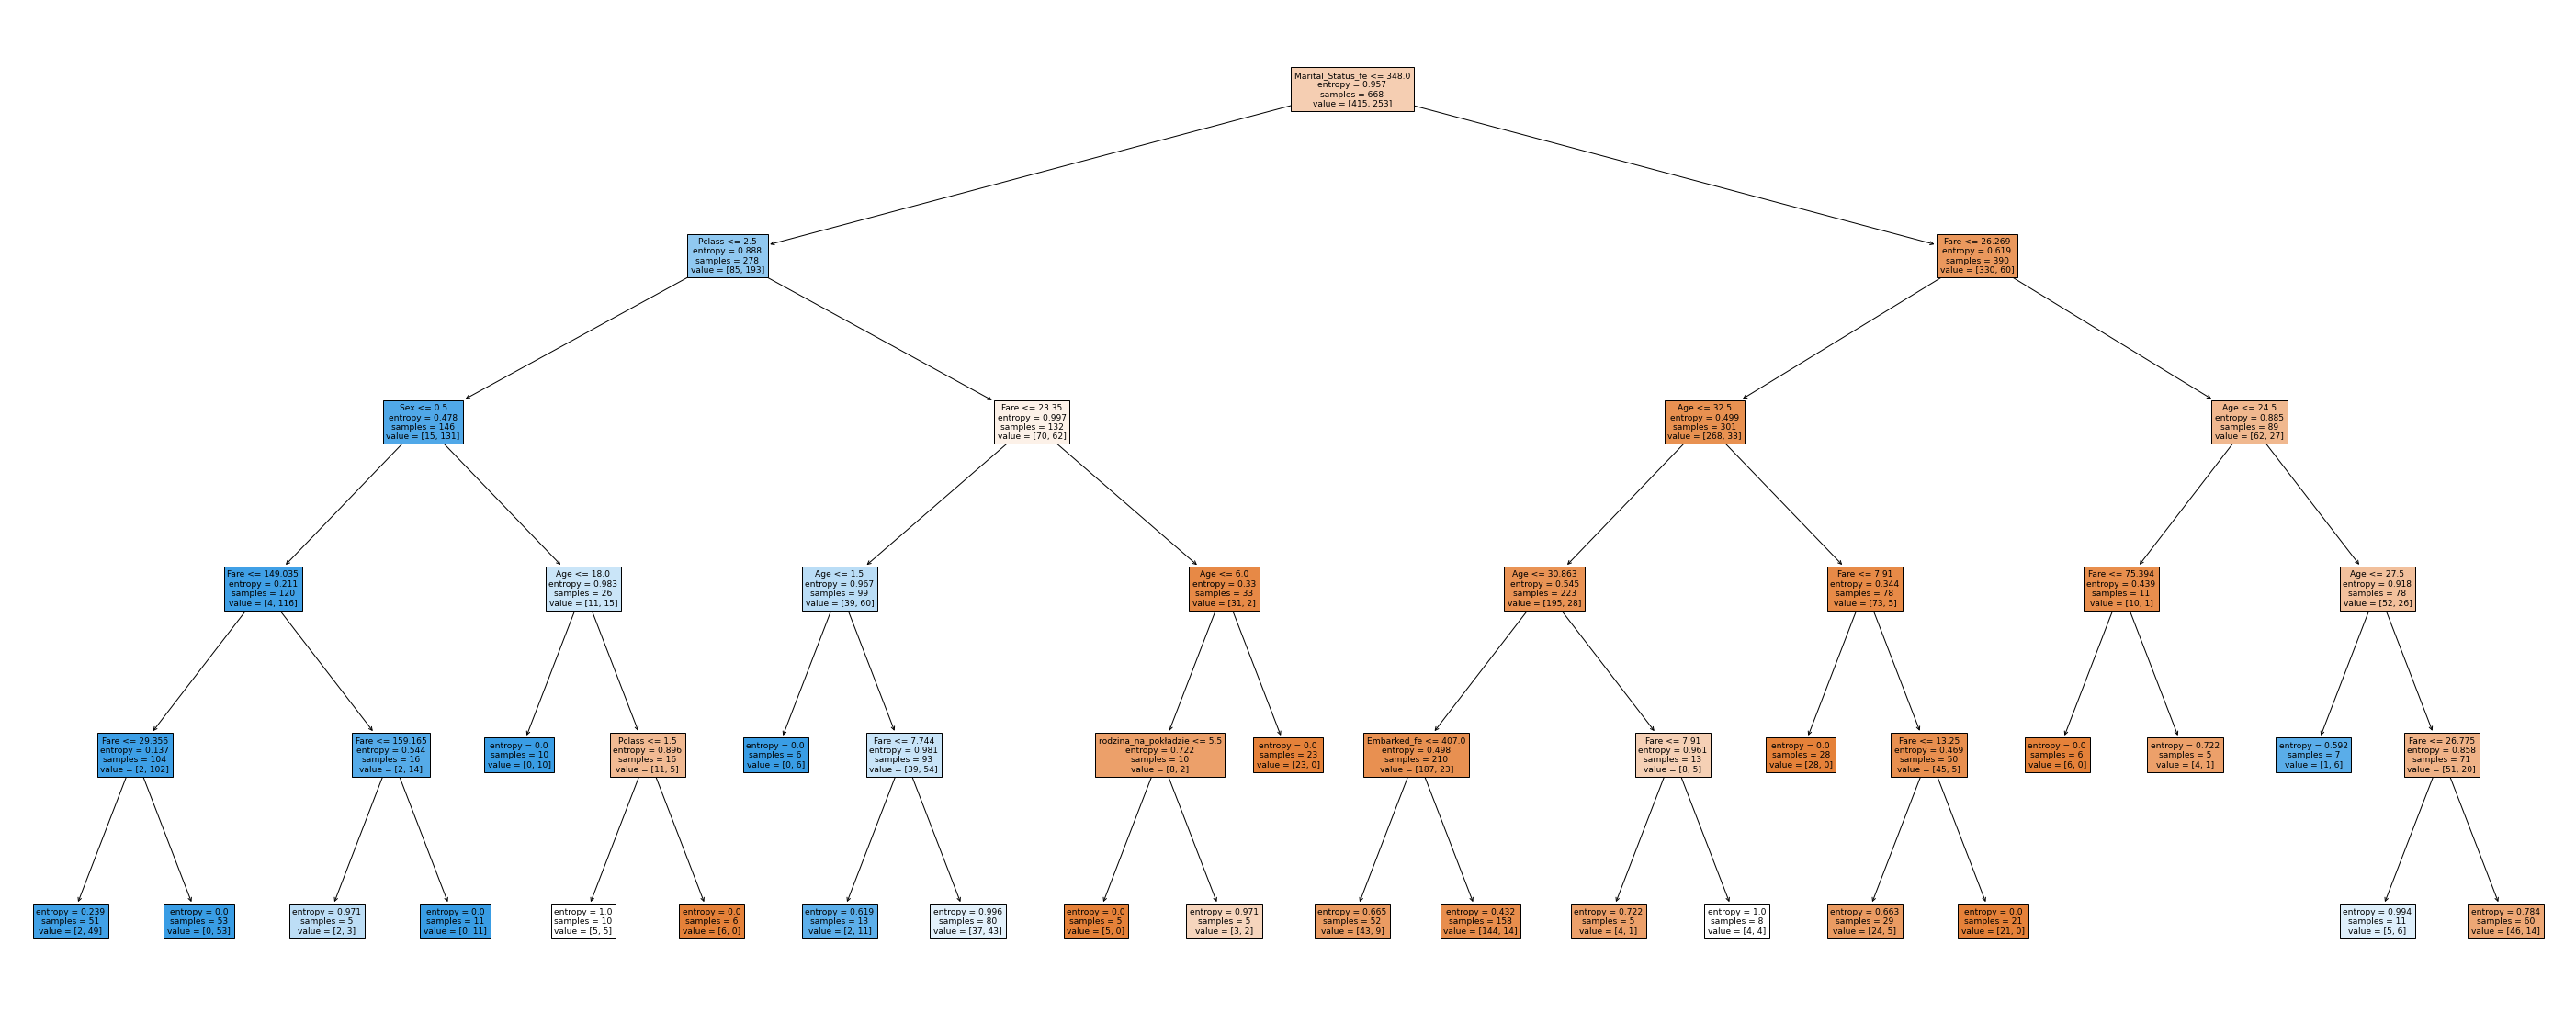

time: 3.94 s (started: 2022-10-23 16:23:46 +02:00)


In [475]:
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(50,20))
_ = tree.plot_tree(model, filled=True, feature_names=model.feature_names_in_)

# Odpowiedź na hipotezy badawcze

1. Nie ma jednoznaczego zaprzeczenia czy też potwierdzenia hipotezy, że bycie w pierwszej klasie zwiększało prawdopodbieństwo
przeżycia, ponieważ nie da się porównać ceteris paribus osób z lepszej klasy z osobą z gorszej klasy. Posłużyłbym się regresją logistyczną
do odopowiedzi na to pytanie

Niestety problem porównania ceteris paribus tyczy się też kolejnych hipotez. 
Zamiast tego opiszę jakie cechy trzeba było mieć, aby miej jak największe prawdopodobieństwo na przeżycie.
Należało mieć status Pan (Mr.), mieć więcej lat niż 32,5 oraz zapłacić za bilet nie więcej niż 7,91 dolarów. Osób w tej grupie
było 28 i wszystkie przeżyły.

Aby miej jak najmniejsze prawdopodobieństwo na przeżycie należało nie mieć statusu Pan (Mr.), 
być w klasie pierwszej lub drugiej, być kobietą oraz zapłacić za bilet między 29,36 dolarów a 149,04 dolarów. Osób w tej grupie
było 53 i wszystkie zginęły.


# Potencjalne kroki, które poprawiłyby możliwości predykcyjne modelu

1. Poświęcenie więcej czasu na eksploracyjną analizę danych

2. Oversampling danych, aby zwiększyć kategorię 0 dla targetu. Na pewno nie undersampling, bo mamy mało danych

3. Wykorzystanie mocniejszego modelu np. typu gradient boosting

4. Użycie większej liczby miar, aby ocenić skuteczność modelu

# Dziękuję za uwagę! :D